# Tesnorflow Scratchpad

## Regression
Trying to reproduce sine


In [9]:
# Tensorflow Linear regression 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

class Regression(object):
    def __init__(self,n_input,n_output):
        self.sess = tf.Session()
        
        self.X =X = tf.placeholder("float32", [None, n_input]) # create symbolic variables
        self.Y = Y = tf.placeholder("float32", [None, n_output])

        # Variables
        shape = [n_input,n_output]
        shape_bias = [1,n_output]
        self.W = W = tf.Variable(tf.random_normal(shape, stddev=0.01),name="weight")
        self.b = b = tf.Variable(tf.random_normal(shape_bias, stddev=0.01),name="b")
        
        # prediction (Regression)
        self.ypred = ypred  = tf.add(tf.mul(X, W), b)
        #defining the cost of 
        self.cost = tf.reduce_sum(tf.pow(ypred-Y, 2))
    
    
    
    def train(self,optimizer,learning_rate,x,y):
        #tf.initialize_all_variables()
        with self.sess:
            tf.initialize_all_variables().run()
            op = optimizer(learning_rate).minimize(self.cost)
            costs = []
            avg_cost = []
            for i in range(100):
                final_y = []
                for (x, y) in zip(trX, trY):
                    self.sess.run(op, feed_dict={self.X: [[x]], self.Y: [[y]]})
                    c = self.sess.run(self.cost, feed_dict={self.X: [[x]], self.Y:[[y]]})
                    yf = self.sess.run(self.ypred, feed_dict={self.X: [[x]], self.Y:[[y]]})
                    costs.append(np.max(c))
                    final_y.append(yf)
                avg_cost.append(np.mean(costs))
                costs = []
            plt.figure(figsize=(20,10)) 
            f, axarr = plt.subplots(2,figsize=(20,10))
            axarr[0].plot(avg_cost)
            axarr[0].set_title('Cost and Prediction Plot')
            axarr[0].set_xlabel("iteration")
            axarr[1].scatter(trX, final_y)
            axarr[1].scatter(trX,trY,color="red")

            #print final_y
            #plt.plot(avg_cost)    

In [68]:
trX = np.linspace(-2, 2, 200)
#trY = 2 * trX + np.random.randn(*trX.shape) * 0.33
# Adding some noise
trY = np.sin(trX)+ np.random.randn(*trX.shape) * 0.66

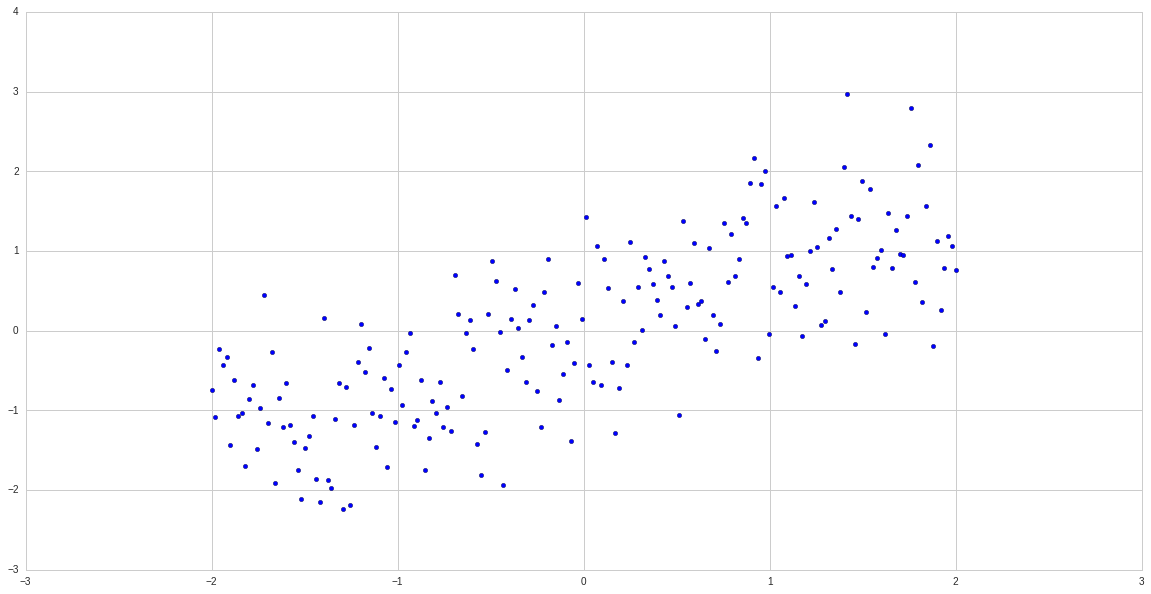

In [11]:
%matplotlib inline
plt.figure(figsize=(20,10)) 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.scatter(trX,trY)

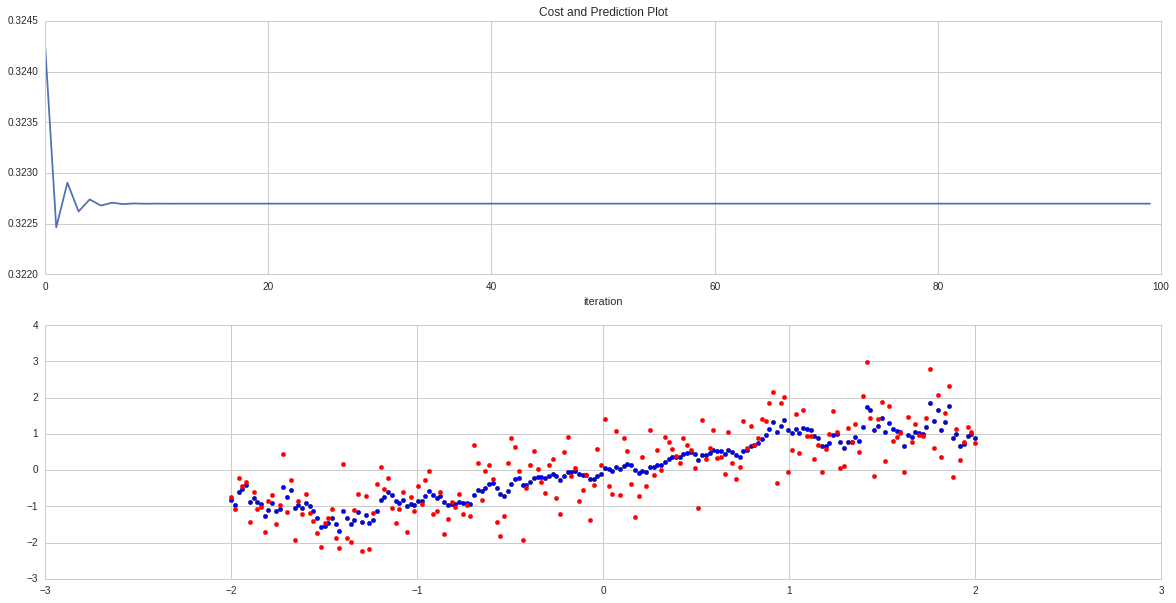

In [13]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
reg = Regression(1,1)

reg.train(tf.train.GradientDescentOptimizer,0.05,trX,trY)

## Logistic Regression
Using MNIST dataset

In [65]:
# Tensorflow Linear regression 
import tensorflow as tf
import numpy as np
import sys

class LogisticRegression(object):
    def __init__(self,n_input,n_output):
        self.sess = tf.Session()
        
        self.X =X = tf.placeholder("float32", [None, n_input]) # create symbolic variables
        self.Y = Y = tf.placeholder("float32", [None, n_output])

        # Variables
        shape = [n_input,n_output]
        shape_bias = [1,n_output]
        self.W = W = tf.Variable(tf.random_normal(shape, stddev=0.01),name="weight")
        self.b = b = tf.Variable(tf.random_normal(shape_bias, stddev=0.01),name="b")
        
        # prediction (with softmax)
        self.ypred = ypred  = tf.nn.softmax(tf.add(tf.matmul(X, W), b))
        #defining the cost of 
        self.cost = tf.reduce_mean(tf.pow(ypred-Y, 2))
    
    
    
    def train(self,optimizer,learning_rate,x,y,n_iter,n_batchsize):
        #tf.initialize_all_variables()
        with self.sess:
            tf.initialize_all_variables().run()
            op = optimizer(learning_rate).minimize(self.cost)
            costs = []
            avg_cost = []
            for i in range(n_iter):
                final_y = []
                j = 0
                for (start, end) in zip(range(0,len(trX),n_batchsize), range(n_batchsize,len(trX),n_batchsize)):
                    j = j+1
                    self.sess.run(op, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    c = self.sess.run(self.cost, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    yf = self.sess.run(self.ypred, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    costs.append(np.mean(c))
                    final_y.append(yf)
                    
                avg_cost.append(np.mean(costs))
                if(i %100 == 0):
                    print i," iteration : Mean cost",np.mean(costs)
                costs = []
            plt.figure(figsize=(20,10)) 
            f, axarr = plt.subplots(1,figsize=(20,10))
            axarr.plot(avg_cost)
            axarr.set_title('Cost and Prediction Plot')
            axarr.set_xlabel("iteration")
            #axarr[1].scatter(trX, final_y)
            #axarr[1].scatter(trX,trY,color="red")

            #print final_y
            #plt.plot(avg_cost)   

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
trX, trY, teX, teY = mnist.train.images[:5000], mnist.train.labels[:5000], mnist.test.images, mnist.test.labels

0  iteration : Mean cost 0.0895251
100  iteration : Mean cost 0.0507796
200  iteration : Mean cost 0.0361848
300  iteration : Mean cost 0.0293383
400  iteration : Mean cost 0.0256177
500  iteration : Mean cost 0.0233001
600  iteration : Mean cost 0.0217004
700  iteration : Mean cost 0.0205146
800  iteration : Mean cost 0.0195887
900  iteration : Mean cost 0.0188375
1000  iteration : Mean cost 0.0182102
1100  iteration : Mean cost 0.0176745
1200  iteration : Mean cost 0.017209
1300  iteration : Mean cost 0.0167987
1400  iteration : Mean cost 0.0164327
1500  iteration : Mean cost 0.0161031
1600  iteration : Mean cost 0.0158037
1700  iteration : Mean cost 0.0155298
1800  iteration : Mean cost 0.0152775
1900  iteration : Mean cost 0.015044
2000  iteration : Mean cost 0.0148266
2100  iteration : Mean cost 0.0146236
2200  iteration : Mean cost 0.0144331
2300  iteration : Mean cost 0.0142538
2400  iteration : Mean cost 0.0140844
2500  iteration : Mean cost 0.0139241
2600  iteration : Mean cos

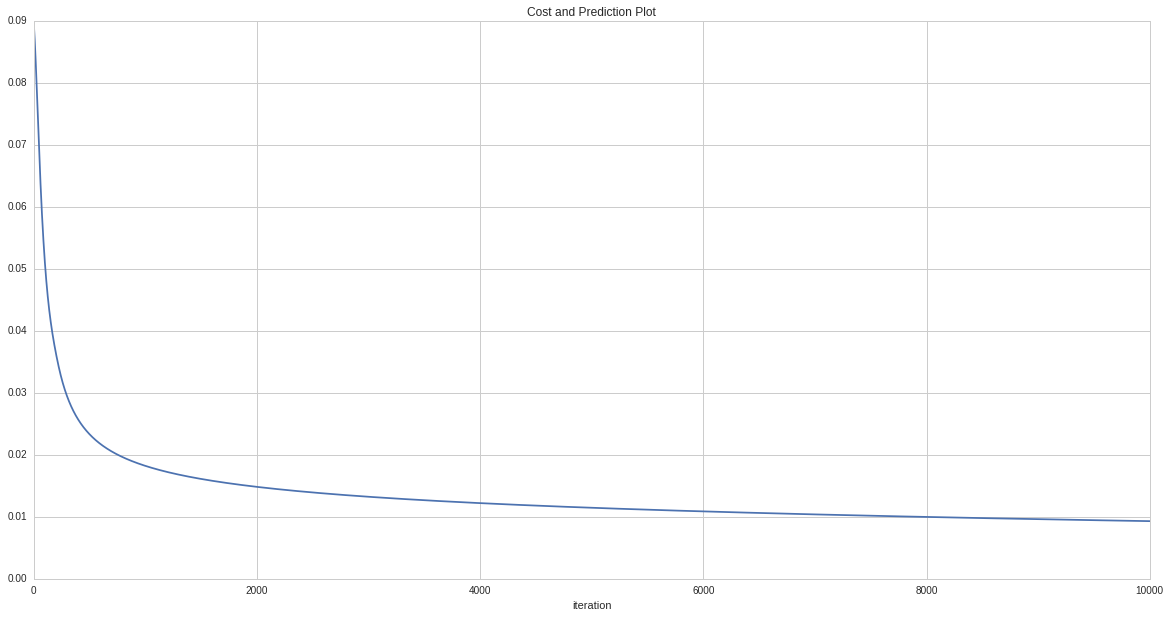

In [67]:
ops.reset_default_graph()
lreg = LogisticRegression(784,10)
lreg.train(tf.train.GradientDescentOptimizer,0.05,trX,trY,10000,400)

Simple example of mean by axis

In [86]:
a = [[1,2,3]]
b = [[2,3,4]]
ap = tf.placeholder("float32", [1, 3])
bp = tf.placeholder("float32", [1, 3])
c = tf.reduce_sum(tf.mul(ap, bp))
with tf.Session() as sess:
    print sess.run(c, feed_dict={ap: a,bp:b})

20.0


## Reinforce Algorithm

This uses the softmax for actions works with gym environment. Currently, for discrete action space

In [653]:
# Tensorflow Linear regression 
import tensorflow as tf
import numpy as np
import sys

class ReinforceDiscreteAgent(object):
    def __init__(self,env):
        n_input = env.observation_space.shape[0]
        n_output = env.action_space.n
        self.sess = tf.Session()
        
        self.X =X = tf.placeholder("float32", [None, n_input],name="Input") # create symbolic variables
        self.Y = Y = tf.placeholder("float32", [None, n_output], name="Action")
        self.r = r = tf.placeholder("float32",[None,1],name="Reward")
        H = 3
        # Variables
        shape = [n_input,H]
        shape_bias = [1,n_output]
        
        self.W1 = W1 = tf.Variable(tf.random_normal(shape, stddev=0.01),name="weight")
        self.b = b = tf.Variable(tf.random_normal(shape_bias, stddev=0.01),name="b")
        self.layer1 = layer1 = tf.nn.tanh(tf.matmul(X,W1))
        self.W2 =W2 = tf.Variable(tf.random_normal([H,n_output], stddev=0.01),name="W2" )
        
        #small value 
        epsilon =1e-8 
        # prediction (with softmax)
        self.ypred = ypred  = tf.nn.softmax(tf.add(tf.matmul(layer1, W2), b))
        self.tvars = tf.trainable_variables()
        #self.grad = tf.gradients()
        #defining the gradient 
        self.loss = -tf.reduce_mean(tf.mul(tf.mul(tf.log(ypred+epsilon),Y),r),1)
        self.sess.run(tf.initialize_all_variables())
        #self.grads = tf.gradients(loss,tvars)
        
    
    def learn(self,optimizer,learning_rate,states,actions,returns,n_iter,n_batchsize):
            
        op = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)
        self.sess.run(tf.initialize_all_variables())
        costs = []
        avg_cost = []
        
        for (start, end) in zip(range(0,len(states),n_batchsize), range(n_batchsize,len(states),n_batchsize)):
            j = j+1
            #g_and_v = op.compute_gradients(self.loss)
            #op.apply_gradients(g_and_v)
            self.sess.run(op, feed_dict={self.X: states[start:end], self.Y: actions[start:end]
                                        , self.r: returns[start:end]})
                

            l = self.sess.run(self.loss, feed_dict={self.X: states[start:end], self.Y: actions[start:end]
                                        , self.r: returns[start:end]})
            
            
    def collect_trajectories(self,env,horizon,n_trajectories = 20):
         # starting state
        gamma = 0.99
        
        T = horizon
        states = []
        actions = []
        returns = []
        total_reward = 0
        trajectories = []
        
        for episodes in range(n_trajectories):
            env_history = []
            #tau = []
            done = 0
            t = 0
            obs = env.reset()
            observation = obs
            while done == 0 and t < T-1:
                action = self.act(observation) # Agent
                observation, reward, done, info = env.step(action)
                onehot_action = np.zeros(env.action_space.n)
                onehot_action[action] = 1
                env_history.append((observation,onehot_action,reward))
                t = t + 1
                if done:
                    total_reward = total_reward+t+1
                    #print("Episode finished after {} timesteps".format(t+1))
                    break

            for idx in range(len(env_history)):
                states.append( env_history[idx][0])
                actions.append(env_history[idx][1])
                returns.append( [np.sum(np.multiply([i[2] for i in env_history[idx:]], 
                                         [gamma**i for i in np.arange(len(env_history[idx:])) ]))
                           ])
                trajectories.append((env_history[idx][0],env_history[idx][1],[np.sum(np.multiply([i[2] for i in env_history[idx:]], 
                                         [gamma**i for i in np.arange(len(env_history[idx:])) ]))
                           ]))
            #trajectories.append(tau)
        tr = np.random.permutation( trajectories)
        states_pr = [t[0] for t in tr ]
        actions_pr = [t[1] for t in tr ]
        returns_pr = [t[2] for t in tr ]
    
        print "Total reward",total_reward
        return states_pr,actions_pr,returns_pr,total_reward
        
    
    
    def act(self,obs):
        #with self.sess as sess:
        tf.initialize_all_variables()
        ypred = self.sess.run(self.ypred,feed_dict={self.X : [obs]})
        #print ypred
        if(ypred[0][0]>ypred[0][1]):
            return 1
        else:
            return 0
            
            

In [654]:
opt = tf.train.GradientDescentOptimizer(0.01)


[2016-08-24 11:56:04,336] Making new env: CartPole-v0


Total reward 205
Total reward 990
Total reward 916
Total reward 934
Total reward 829
Total reward 779
Total reward 771
Total reward 681
Total reward 700
Total reward 737
Total reward 762
Total reward 756
Total reward 693
Total reward 704
Total reward 661
Total reward 679
Total reward 625
Total reward 620
Total reward 659
Total reward 618


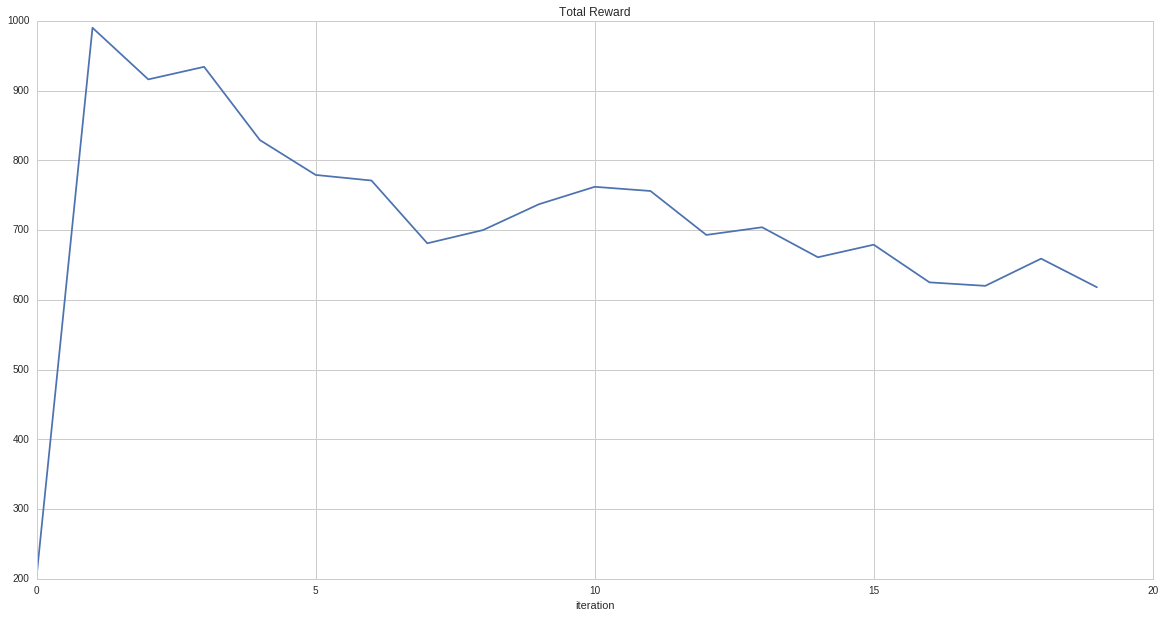

In [660]:
import gym
from tensorflow.python.framework import ops
ops.reset_default_graph()
env = gym.make('CartPole-v0')
rf = ReinforceDiscreteAgent(env)
rs = []
for i in range(20):
    states,actions,returns,total_reward = rf.collect_trajectories(env,200)
    rf.learn(opt,0.01,states,actions,returns,n_iter=100,n_batchsize=100)
    states = None
    actions = None
    returns = None
    rs.append(total_reward)
plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(1,figsize=(20,10))
axarr.plot(rs)
axarr.set_title('Total Reward')
axarr.set_xlabel("iteration")

In [651]:
import gym
from tensorflow.python.framework import ops
ops.reset_default_graph()
env = gym.make('CartPole-v0')
rf = ReinforceDiscreteAgent(env)
rs = []
for i in range(10):
    states,actions,returns,total_reward = rf.collect_trajectories(env,100)
    rf.learn(opt,0.01,states,actions,returns,100,20)
    states = None
    actions = None
    returns = None
    rs.append(total_reward)
plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(1,figsize=(20,10))
axarr.plot(rs)
axarr.set_title('Total Reward')
axarr.set_xlabel("iteration")

[2016-08-24 11:52:32,583] Making new env: CartPole-v0


Episode finished after 10 timesteps
Episode finished after 10 timesteps
Episode finished after 10 timesteps
Episode finished after 11 timesteps
Episode finished after 10 timesteps
Episode finished after 11 timesteps
Episode finished after 10 timesteps
Episode finished after 11 timesteps
Episode finished after 10 timesteps
Episode finished after 11 timesteps
Episode finished after 11 timesteps
Episode finished after 9 timesteps
Episode finished after 11 timesteps
Episode finished after 10 timesteps
Episode finished after 9 timesteps
Episode finished after 10 timesteps
Episode finished after 11 timesteps
Episode finished after 11 timesteps
Episode finished after 10 timesteps
Episode finished after 11 timesteps
Total reward 207
Episode finished after 35 timesteps
Episode finished after 53 timesteps
Episode finished after 31 timesteps
Episode finished after 31 timesteps
Episode finished after 31 timesteps
Episode finished after 53 timesteps
Episode finished after 40 timesteps
Episode finis

KeyboardInterrupt: 

In [699]:
 # Tensorflow Linear regression 
import tensorflow as tf
import numpy as np
import sys

class ReinforceDiscreteAgent(object):
    def __init__(self,env):
        n_input = env.observation_space.shape[0]
        n_output = env.action_space.n
        self.sess = tf.Session()
        
        self.X =X = tf.placeholder("float32", [None, n_input],name="Input") # create symbolic variables
        self.Y = Y = tf.placeholder("float32", [None, n_output], name="Action")
        self.r = r = tf.placeholder("float32",[None,1],name="Reward")
        H = 3
        # Variables
        shape = [n_input,H]
        shape_bias = [1,n_output]
        
        self.W1 = W1 = tf.Variable(tf.random_normal(shape, stddev=0.01),name="weight")
        self.b = b = tf.Variable(tf.random_normal(shape_bias, stddev=0.01),name="b")
        self.layer1 = layer1 = tf.nn.tanh(tf.matmul(X,W1))
        self.W2 =W2 = tf.Variable(tf.random_normal([H,n_output], stddev=0.01),name="W2" )
        
        #small value 
        epsilon =1e-8 
        # prediction (with softmax)
        self.ypred = ypred  = tf.nn.softmax(tf.add(tf.matmul(layer1, W2), b))
        self.tvars = tf.trainable_variables()
        #self.grad = tf.gradients()
        #defining the gradient 
        self.loss = -tf.reduce_mean(tf.mul(tf.mul(tf.log(ypred+epsilon),Y),r),1)
        learning_rate = 1
        self.op = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)
        self.sess.run(tf.initialize_all_variables())
        #self.grads = tf.gradients(loss,tvars)
        
    
    def learn(self,optimizer,learning_rate,states,actions,returns,n_batchsize):
            
        
        self.sess.run(self.op,feed_dict = {self.X: states, self.Y: actions
                                       , self.r: returns})
        
        #g_and_v = op.compute_gradients(self.loss)
        #op.apply_gradients(g_and_v)
#         grad= self.sess.run(self.gradient, feed_dict={self.X: states, self.Y: actions
#                                         , self.r: returns})/len(states)
#         gradient = tf.gradients(grad,self.tvars)
#         op.apply_gradient(zip(gradient,))
                

            
            
            
    def collect_trajectories(self,env,horizon,n_trajectories = 20):
         # starting state
        gamma = 0.99
        
        T = horizon
        states = []
        actions = []
        returns = []
        total_reward = 0
        trajectories = []
        
        for episodes in range(n_trajectories):
            env_history = []
            #tau = []
            done = 0
            t = 0
            obs = env.reset()
            observation = obs
            while done == 0 and t < T-1:
                action = self.act(observation) # Agent
                observation, reward, done, info = env.step(action)
                onehot_action = np.zeros(env.action_space.n)
                onehot_action[action] = 1
                env_history.append((observation,onehot_action,reward))
                t = t + 1
                if done:
                    total_reward = total_reward+t+1
                    #print("Episode finished after {} timesteps".format(t+1))
                    break

            for idx in range(len(env_history)):
                states.append( env_history[idx][0])
                actions.append(env_history[idx][1])
                returns.append( [np.sum(np.multiply([i[2] for i in env_history[idx:]], 
                                         [gamma**i for i in np.arange(len(env_history[idx:])) ]))
                           ])
                trajectories.append((env_history[idx][0],env_history[idx][1],[np.sum(np.multiply([i[2] for i in env_history[idx:]], 
                                         [gamma**i for i in np.arange(len(env_history[idx:])) ]))
                           ]))
            #trajectories.append(tau)
        #tr = np.random.permutation( trajectories)
        #states_pr = [t[0] for t in tr ]
        #actions_pr = [t[1] for t in tr ]
        #returns_pr = [t[2] for t in tr ]
    
        print "Average reward",total_reward/n_trajectories
        return states,actions,returns,total_reward
        
    
    
    def act(self,obs):
        #with self.sess as sess:
        tf.initialize_all_variables()
        ypred = self.sess.run(self.ypred,feed_dict={self.X : [obs]})
        #print ypred
        if(ypred[0][0]>ypred[0][1]):
            return 1
        else:
            return 0

In [ ]:
import gym
import time

from tensorflow.python.framework import ops
ops.reset_default_graph()
env = gym.make('CartPole-v0')
rf = ReinforceDiscreteAgent(env)
rs = []
for i in range(100):
    env = gym.make('CartPole-v0')
    start_time = time.clock()
    states,actions,returns,total_reward = rf.collect_trajectories(env,200)
    print time.clock() - start_time, "seconds in trajectories"
    start_time = time.clock()
    rf.learn(opt,0.01,states,actions,returns,20)
    print time.clock() - start_time, "seconds in RL Learn"
    states = None
    actions = None
    returns = None
    rs.append(total_reward)
    env.close()
plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(1,figsize=(20,10))
axarr.plot(rs)
axarr.set_title('Total Reward')
axarr.set_xlabel("iteration")

[2016-08-24 17:21:20,935] Making new env: CartPole-v0
[2016-08-24 17:21:21,292] Making new env: CartPole-v0
[2016-08-24 17:21:22,032] Making new env: CartPole-v0


Average reward 10
0.677368000001 seconds in trajectories
0.0261129999999 seconds in RL Learn


[2016-08-24 17:21:23,404] Making new env: CartPole-v0


Average reward 10
1.240391 seconds in trajectories
0.00189099999989 seconds in RL Learn


[2016-08-24 17:21:52,904] Making new env: CartPole-v0


Average reward 42
28.171124 seconds in trajectories
0.00482699999702 seconds in RL Learn
